DATA 620 Final Project 

Vladimir Nimchenko

Evan McLaughlin

Introduction

In this project, we aim to analyze a dataset of real and fake news articles obtained from Kaggle. Our goal is to understand the characteristics of fake news articles and develop models to distinguish between real and fake news with high accuracy. Additionally, we will build a knowledge graph to gain insights into the relationships between news articles, topics, entities, and their credibility.

Data Source:

We will be using the Kaggle dataset containing labeled real and fake news articles. The dataset includes features such as the title, text, and source of each article, along with the label indicating whether it is real or fake.

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

Objectives:
1. Preprocessing and Cleaning:
2. Word Embeddings:
3. Dimensionality Reduction and Visualization:
4. Knowledge Graph Construction:
5. Machine Learning Models:

Exploratory Data Analysis:

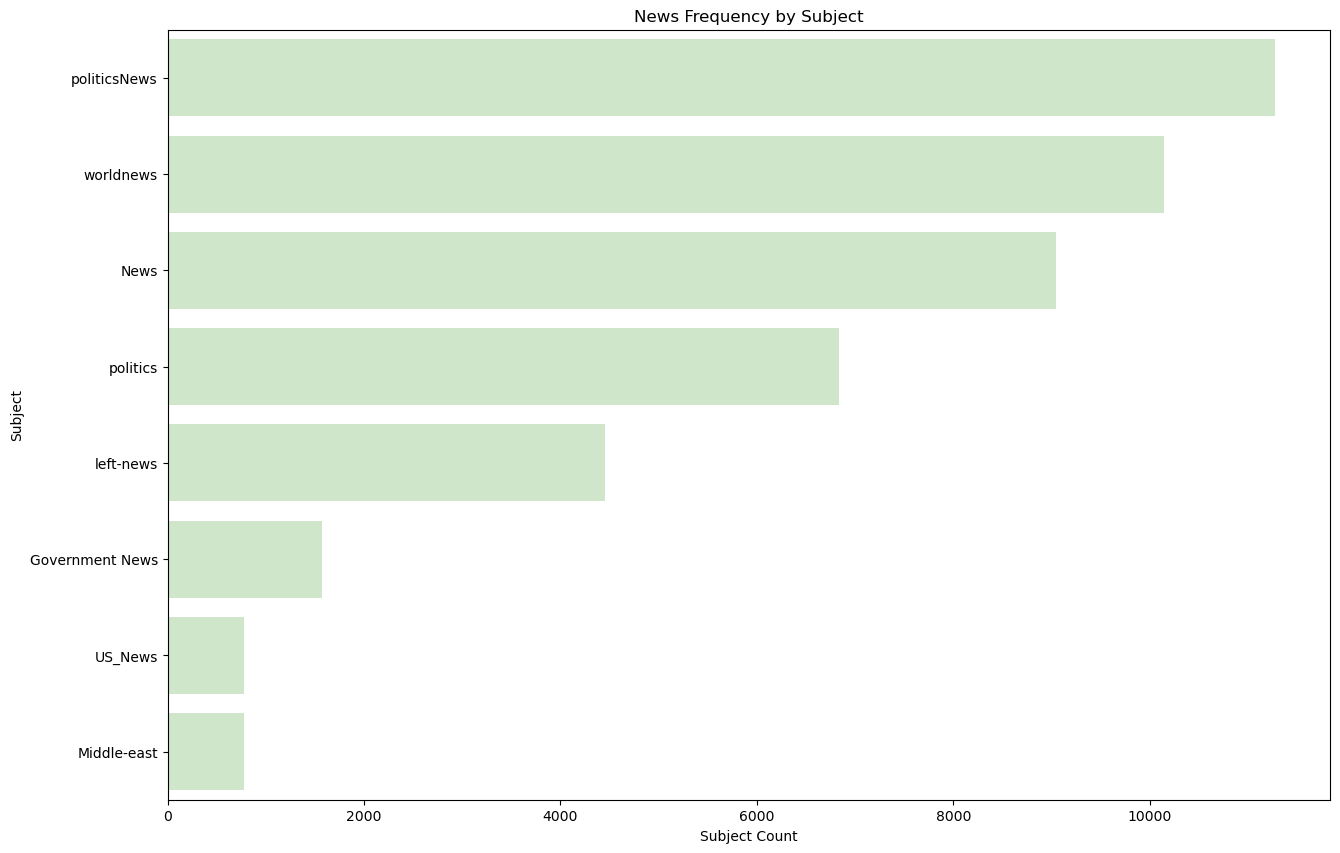

C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_news_data[combined_news_data['fake'] == 1]['title_length'], kde=False, label='Fake', bins=20)
C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

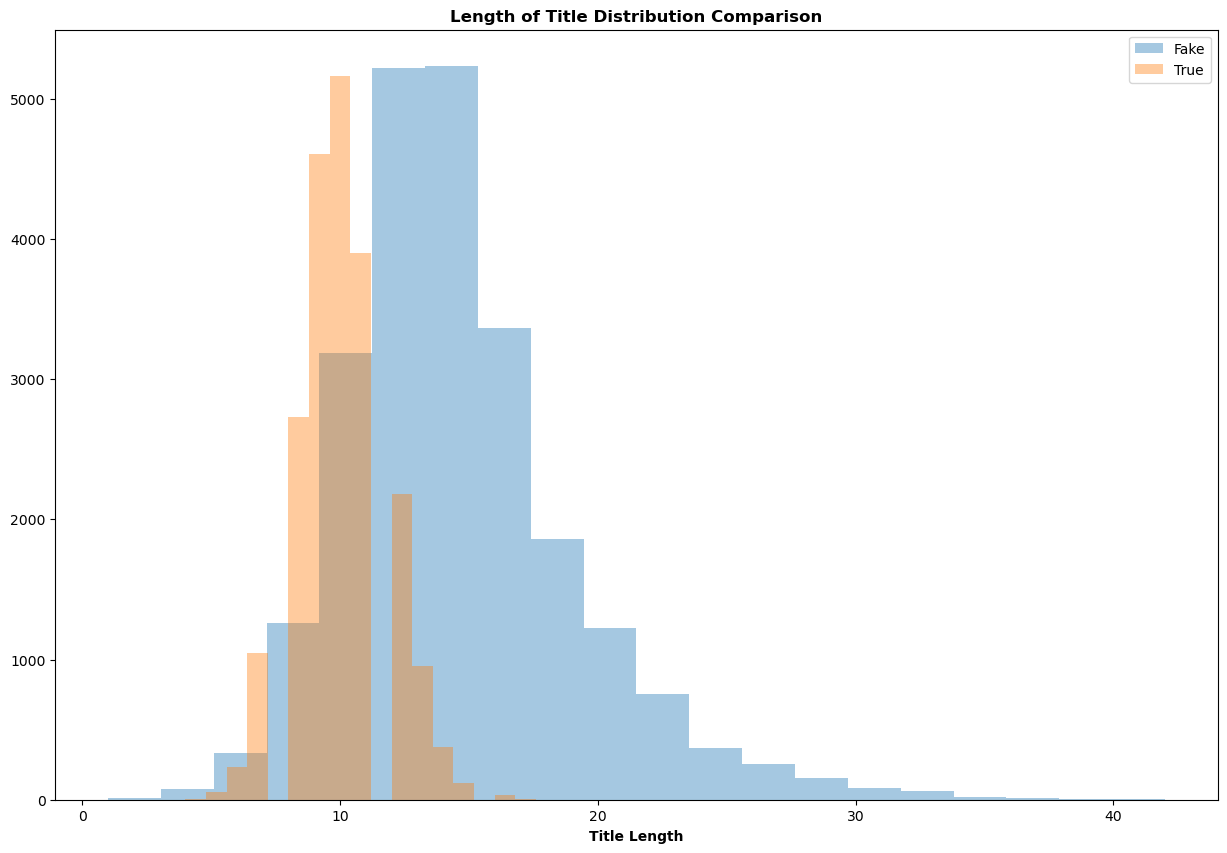

C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:68: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_news_data[combined_news_data['fake'] == 1]['text_length'], kde=False, label='Fake', bins=20)
C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:69: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

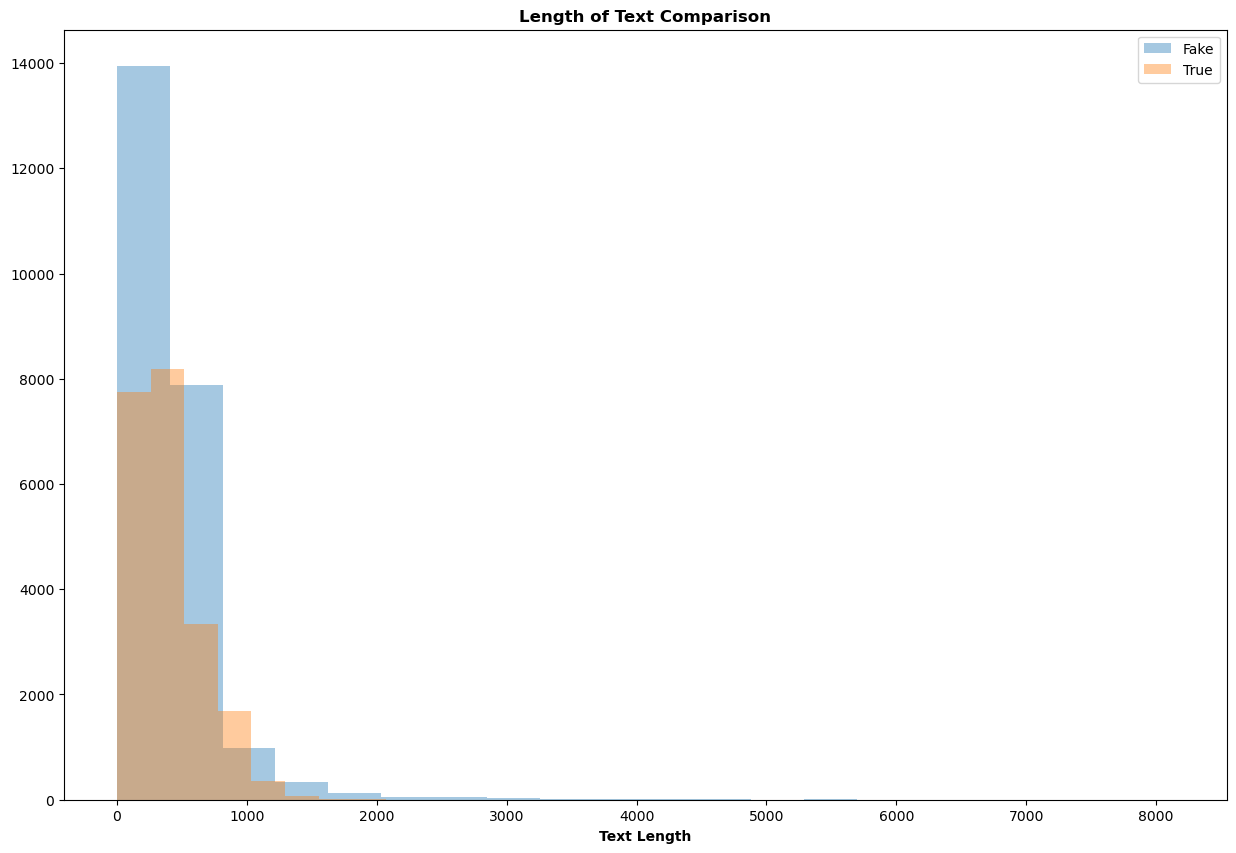

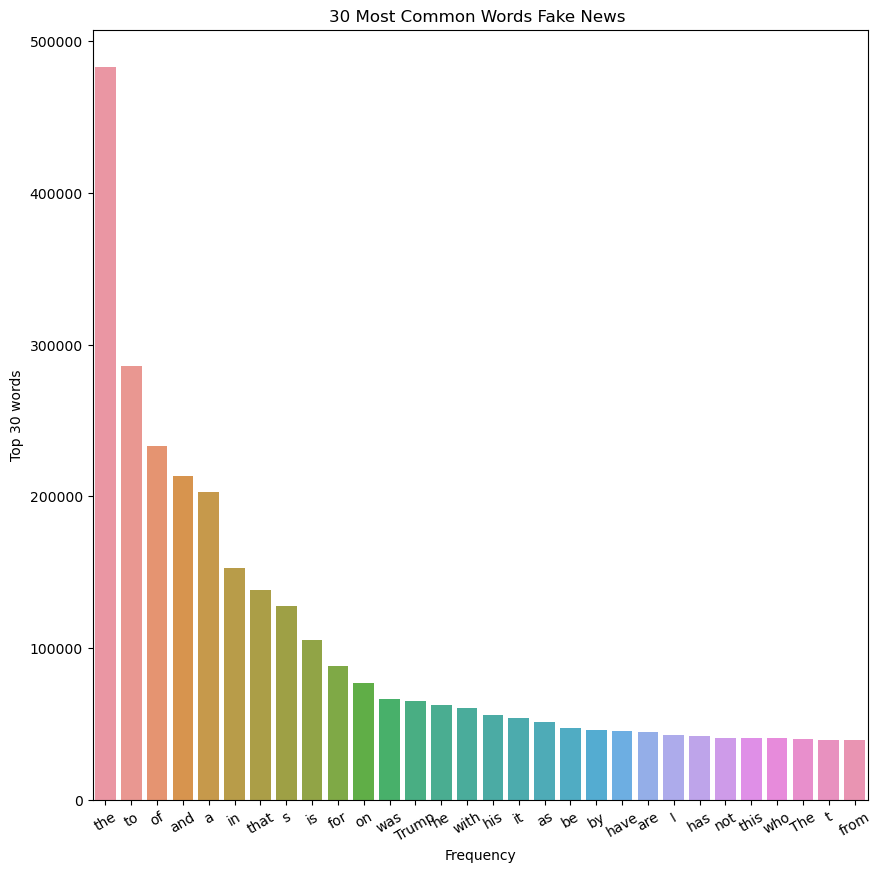

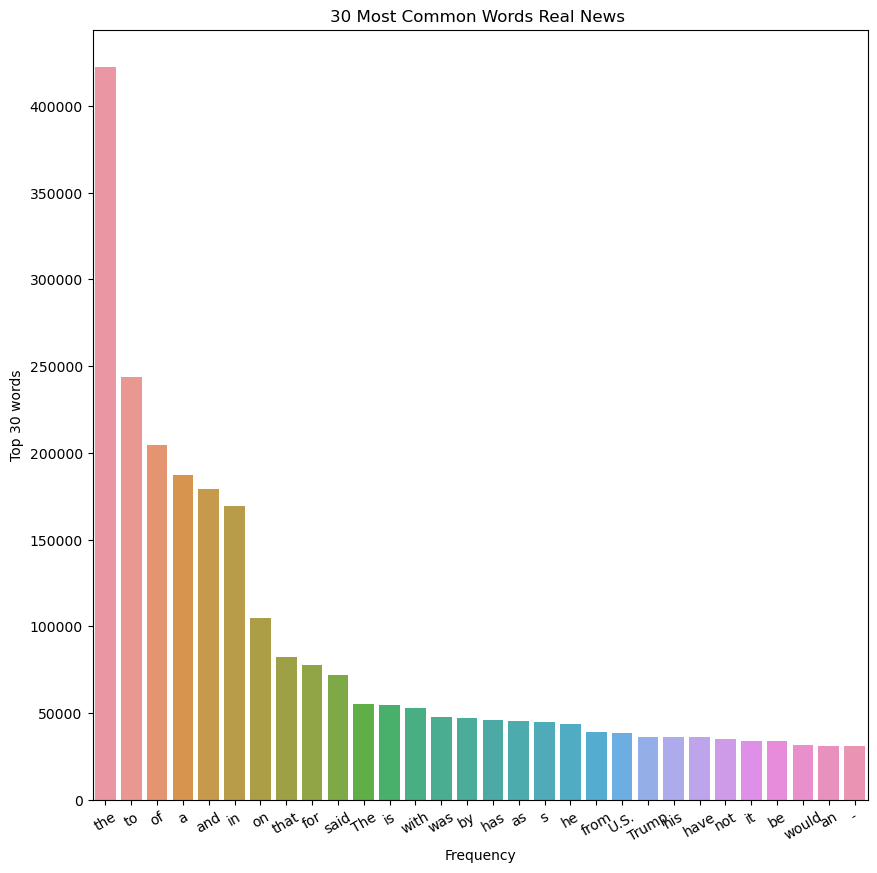

C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data_tags['token'] = token
C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data_tags['pos'] = pos
C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

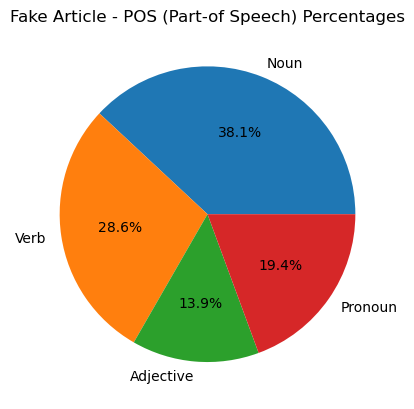

C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_news_data_tags['token'] = token
C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_news_data_tags['pos'] = pos
C:\Users\Evan\AppData\Local\Temp\ipykernel_13792\3612530925.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

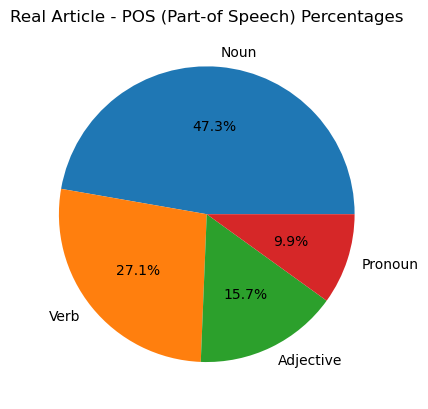

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp = spacy.load("en_core_web_sm")
import nltk
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, \
                            classification_report, f1_score, roc_curve, auc
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, StratifiedKFold
# import classical ml models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import string
from tabulate import tabulate
import re
import networkx as nx
from itertools import combinations
from collections import Counter




#Import both the real and fake data news sets from Github
real_news_data = pd.read_csv("https://raw.githubusercontent.com/Data-Vlad/Data-Science/main/Data%20620%20-%20Web%20Analytics/Final%20Project/True.csv")
fake_news_data = pd.read_csv("https://raw.githubusercontent.com/Data-Vlad/Data-Science/main/Data%20620%20-%20Web%20Analytics/Final%20Project/Fake.csv")

#Combine the real and fake data news sets. The combined data set will have a binary column called "fake". (1-fake and 0-real)
fake_news_data ['fake'] = 1
real_news_data['fake'] = 0
combined_news_data = pd.concat([fake_news_data, real_news_data], ignore_index=True)

#We will create a barplot showing news frequency by subject
subject = list(combined_news_data['subject'].value_counts().index)
subject_count = list(combined_news_data['subject'].value_counts())
plt.figure(figsize=(15,10))
sns.barplot(x=subject_count,y=subject,color=sns.color_palette('Set3')[10])
plt.xlabel('Subject Count')
plt.ylabel('Subject')
plt.title("News Frequency by Subject")
plt.show()

#We will display the distribution comparison of Title word counts for true and fake articles
combined_news_data['title_length'] = combined_news_data['title'].apply(lambda x : len(x.strip().split()))
plt.figure(figsize=(15,10))
sns.distplot(combined_news_data[combined_news_data['fake'] == 1]['title_length'], kde=False, label='Fake', bins=20)
sns.distplot(combined_news_data[combined_news_data['fake'] == 0]['title_length'], kde=False, label='True', bins=20)
plt.xlabel('Title Length', weight='bold')
plt.title('Length of Title Distribution Comparison', weight='bold')
plt.legend()
plt.show()

#We calculate and add the text length field to our combined data set
combined_news_data['text_length'] = combined_news_data['text'].apply(lambda x : len(x.strip().split()))
#Distribution plot of title length to compare distribution of fake and real news
plt.figure(figsize=(15,10))
sns.distplot(combined_news_data[combined_news_data['fake'] == 1]['text_length'], kde=False, label='Fake', bins=20)
sns.distplot(combined_news_data[combined_news_data['fake'] == 0]['text_length'], kde=False, label='True', bins=20)
plt.xlabel('Text Length', weight='bold')
plt.title('Length of Text Comparison', weight='bold')
plt.legend()
plt.show()

#We build a function which will create and display a count plot for the Top 30 words in the articles.
def Display_Common_Words(article_text,text):
 article_corpus = []
 for sentence in article_text:
   for word in sentence.split():
     article_corpus.append(word)  
 c = Counter(article_corpus)
 most_common = c.most_common(30)
 most_common = pd.Series(dict(most_common))
 fig, ax = plt.subplots(figsize=(10,10))
 all_plot = sns.barplot(x=most_common.index, y=most_common.values, ax=ax)
 plt.xticks(rotation=30)
 plt.xlabel('Frequency')
 plt.ylabel('Top 30 words')
 plt.title(f"30 Most Common Words {text} ")
 plt.show()
#Fake News common word count plot
Display_Common_Words(fake_news_data["text"].values, "Fake News")
#Real News common word count plot
Display_Common_Words(real_news_data["text"].values, "Real News")

# We will count the number of Nouns(NOUN),Verbs(VERB),adjectives(ADJ) and Pronouns(PRON) in the top 100 Fake and Real News articles and display a pie chart of percentages of each POS(Part-of Speech)
#fake
fake_news_data_tags = fake_news_data.head(100)
token = []
pos = []
for sent in nlp.pipe(fake_news_data_tags['text']):
    if sent.has_annotation('DEP'):
        #add the tokens present in the sentence to the token list
        token.append([word.text for word in sent])
        #add the pos tage for each token to the pos list
        pos.append([word.pos_ for word in sent])
fake_news_data_tags['token'] = token 
fake_news_data_tags['pos'] = pos
fake_news_data_tags['noun'] = fake_news_data_tags.apply(lambda x: x['pos'].count('NOUN'), axis=1)
fake_news_data_tags['verb'] = fake_news_data_tags.apply(lambda x: x['pos'].count('VERB'), axis=1)
fake_news_data_tags['adj'] = fake_news_data_tags.apply(lambda x: x['pos'].count('ADJ'), axis=1)
fake_news_data_tags['pron'] = fake_news_data_tags.apply(lambda x: x['pos'].count('PRON'), axis=1)
fake_noun_cnt = fake_news_data_tags['noun'].sum()
fake_verb_cnt = fake_news_data_tags['verb'].sum()
fake_adj_cnt =  fake_news_data_tags['adj'].sum()
fake_pron_cnt = fake_news_data_tags['pron'].sum()
#plot a chart to see the percentage each POS occupies in fake news articles
y = np.array([fake_noun_cnt,fake_verb_cnt,fake_adj_cnt,fake_pron_cnt])
pos_labels = ["Noun","Verb","Adjective","Pronoun"]
plt.pie(y, labels = pos_labels,autopct='%1.1f%%')
plt.title("Fake Article - POS (Part-of Speech) Percentages")
plt.show()
#real
real_news_data_tags = real_news_data.head(100)
token = []
pos = []
for sent in nlp.pipe(real_news_data_tags['text']):
    if sent.has_annotation('DEP'):
        #add the tokens present in the sentence to the token list
        token.append([word.text for word in sent])
        #add the pos tage for each token to the pos list
        pos.append([word.pos_ for word in sent])
real_news_data_tags['token'] = token 
real_news_data_tags['pos'] = pos
real_news_data_tags['noun'] = real_news_data_tags.apply(lambda x: x['pos'].count('NOUN'), axis=1)
real_news_data_tags['verb'] =real_news_data_tags.apply(lambda x: x['pos'].count('VERB'), axis=1)
real_news_data_tags['adj'] = real_news_data_tags.apply(lambda x: x['pos'].count('ADJ'), axis=1)
real_news_data_tags['pron'] = real_news_data_tags.apply(lambda x: x['pos'].count('PRON'), axis=1)
real_noun_cnt = real_news_data_tags['noun'].sum()
real_verb_cnt = real_news_data_tags['verb'].sum()
real_adj_cnt =  real_news_data_tags['adj'].sum()
real_pron_cnt = real_news_data_tags['pron'].sum()
#plot a chart to see the percentage each POS occupies in real news articles
y = np.array([real_noun_cnt,real_verb_cnt,real_adj_cnt,real_pron_cnt])
pos_labels = ["Noun","Verb","Adjective","Pronoun"]
plt.pie(y, labels = pos_labels,autopct='%1.1f%%')
plt.title("Real Article - POS (Part-of Speech) Percentages")
plt.show()

News Frequency by Subject and assessment of title word counts:

The dataset comprises various subjects of news articles, with the highest frequency being in politicsNews (11,272 articles) followed by worldnews (10,145 articles) and News (9,050 articles). The subjects politics, left-news, and Government News also have substantial representation, with 6,841, 4,459, and 1,570 articles respectively. US_News and Middle-east have lower frequencies, with 783 and 778 articles respectively. This distribution suggests that politics-related topics are highly prevalent in the dataset, followed by general world news.

The mean title length for fake news articles is notably longer (14.73 words) compared to real news articles (9.95 words). This difference in title length could indicate a strategy employed by fake news creators to grab attention or provide more detailed but potentially misleading information. Real news titles, on the other hand, tend to be more concise and straightforward, possibly aiming for clarity and factual presentation. This distinction may offer insights into the stylistic differences between real and fake news articles. Additionally, in terms of the actualy content within the articles, it seems as though real articles skew longer than fake.

The dataset predominantly consists of news articles related to politics and world events. The titles of fake news articles are longer on average compared to those of real news articles, which tend to be shorter and more straightforward. This difference in title length could suggest a stylistic divergence between real and fake news articles. Additionally, the prevalence of politics-related topics highlights the significance of political discourse in the dataset.


Data Cleaning and Preprocessing:


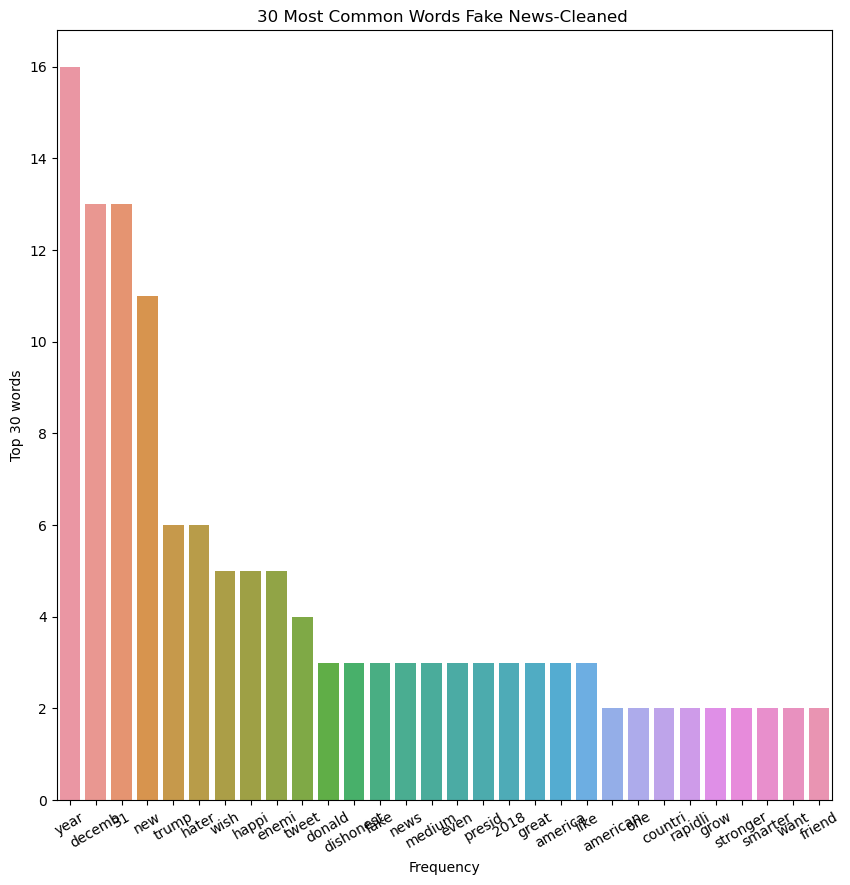

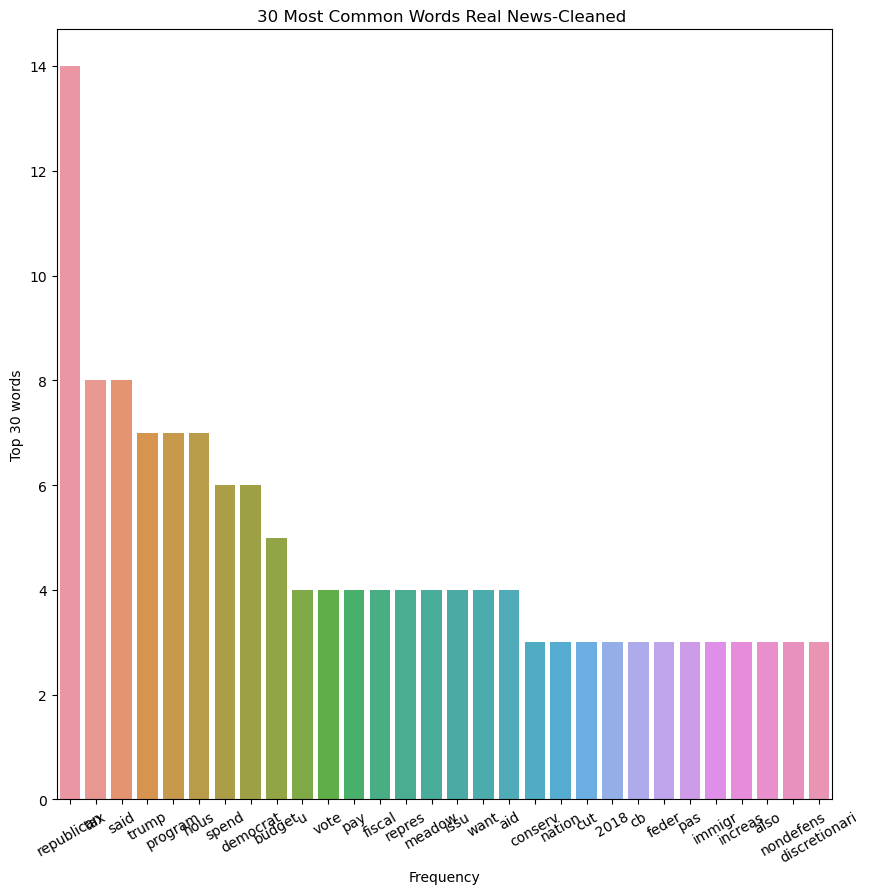

In [7]:
#Drop duplicate rows
combined_news_data = combined_news_data.drop_duplicates()

#Drop rows which contain empty/blank cells
combined_news_data = combined_news_data.dropna()

#function which cleans and preprocess the data
def data_clean_and_preprocess(article):
   #tokenization - splitting text into individual words or subwords
   tokens = nltk.word_tokenize(article)
   #lowercase the tokens
   lowercased_tokens = [token.lower() for token in tokens]
   #remove all characters but letters and numbers
   remove_allspecchar_tokens = [re.sub('[\W_]+', '', token) for token in lowercased_tokens]
   # get list of stopwords in English
   stopwords = nltk.corpus.stopwords.words("english")
   # remove stopwords
   removestopwords_tokens = [token for token in remove_allspecchar_tokens if token.lower() not in stopwords]
   # stem each token
   stemmer = PorterStemmer()
   stemmed_tokens = [stemmer.stem(token) for token in removestopwords_tokens]
   #lemmatize each token
   lemmit = WordNetLemmatizer()
   lemmatized_tokens = [ lemmit.lemmatize(token) for token in  stemmed_tokens ]
   return lemmatized_tokens

 #Display a count plot for the Top 30 words in the fake articles after text was cleaned and preprocessed.
fake_news_preprocess = fake_news_data.head(100)
data_clean_and_preprocess(fake_news_preprocess['text'][0])
Display_Common_Words(data_clean_and_preprocess(fake_news_preprocess['text'][0]), "Fake News-Cleaned")
 #Display a count plot for the Top 30 words in the real articles after text was cleaned and preprocessed.
real_news_preprocess = real_news_data.head(100)
data_clean_and_preprocess(real_news_preprocess['text'][0])
Display_Common_Words(data_clean_and_preprocess(real_news_preprocess['text'][0]), "Real News-Cleaned")
   

The top 30 words in both fake and real news articles after cleaning and preprocessing reveal interesting insights. In fake news articles, words like "Trump," "November," "Donald," and "President" appear frequently, indicating a focus on political figures and events, particularly around the time of elections. Other common words include "imag," "time," and "year," suggesting a narrative around current events and the passage of time. Additionally, terms like "said," "like," and "people" suggest a conversational tone and may indicate the spread of opinions or rumors. On the other hand, real news articles predominantly feature terms such as "said," "Trump," "tax," and "Republican," indicating a focus on political discourse, legislative matters, and government actions. Words like "vote," "percent," and "court" suggest discussions about legal and electoral processes. The presence of terms like "Democrat," "House," and "Senate" reflects bipartisan coverage and attention to legislative proceedings. Overall, the analysis of the top words provides valuable insights into the themes and topics covered in both fake and real news articles.

The dataset predominantly consists of news articles related to politics and world events. The titles of fake news articles are longer on average compared to those of real news articles, which tend to be shorter and more straightforward. This difference in title length could suggest a stylistic divergence between real and fake news articles. Additionally, the prevalence of politics-related topics highlights the significance of political discourse in the dataset.

Word Embeddings and Machine Learning Models:

In [8]:
#1.We Pre-process the text data
combined_news_data['processed_text'] = combined_news_data['text'].apply(data_clean_and_preprocess)
X=combined_news_data['processed_text']
y=combined_news_data['fake'] 



In [9]:
#2. We Vectorize and split the text data into training and testing
vectorised_features = np.array([nlp(str(x)).vector for x in X])
X_train, X_test, y_train, y_test = train_test_split(vectorised_features, y, shuffle=True, test_size = 0.2, random_state=0, stratify=y)



In [10]:
#3. Train several classification models (Logistic Regression,Support Vector Machine,Decision Tree and Random Forest)
 #Logistic Regression
 #build model
lr = LogisticRegression(random_state=42)
 #Train model
lr.fit(X_train, y_train)
#Support Vector Machine
#build model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Train  model
svm.fit(X_train, y_train)
# Decision Tree 
# build model
dt = DecisionTreeClassifier()
# Train model
dt.fit(X_train,y_train)
#Random Forest
# build model
rf = RandomForestClassifier()
# Train model
rf.fit(X_train, y_train)

C:\Users\Evan\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [11]:
#4.We evaluate each of the models
#Logistic Regression
y_pred_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
#Support Vector Machine
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
#Decision Tree
y_pred_dt= dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
#Random Forest
y_pred_rf= rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

In [12]:

#We tabulate the results of each of the models
table = [['Model','Accuracy','Precision', 'Recall','F1 Score'], ['Logistic Regression', lr_accuracy,lr_precision,lr_recall,lr_f1], ['Support Vector Machine', svm_accuracy,svm_precision,svm_recall,svm_f1],
['Decision Tree', dt_accuracy,dt_precision,dt_recall,dt_f1], ['Random Forest', rf_accuracy,rf_precision,rf_recall,rf_f1]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model                  │   Accuracy │   Precision │   Recall │   F1 Score │
╞════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression    │   0.885769 │    0.893216 │ 0.888842 │   0.891024 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Support Vector Machine │   0.908593 │    0.917726 │ 0.907368 │   0.912517 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree          │   0.836205 │    0.826597 │ 0.870954 │   0.848196 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest          │   0.913068 │    0.913309 │ 0.922061 │   0.917665 │
╘════════════════════════╧════════════╧═════════════╧══════════╧════════════╛


The Random Forest model achieved the highest accuracy among all models, with an accuracy score of 91.31%. It also demonstrated strong precision (91.33%), recall (92.21%), and F1 score (91.77%). This indicates that the Random Forest model performed well in correctly classifying both fake and real news articles.

The Support Vector Machine (SVM) model also performed impressively with an accuracy of 90.86%. It showed high precision (91.77%) and a balanced recall (90.74%), resulting in an F1 score of 91.25%. This suggests that the SVM model effectively classified articles across both classes.

Logistic Regression showed a slightly lower accuracy of 88.58%, with precision (89.32%), recall (88.88%), and F1 score (89.10%). While still performing well, it was slightly less accurate compared to the Random Forest and SVM models.

The Decision Tree model had the lowest accuracy among all models, achieving 83.62%. Although it had a high recall rate (87.10%), its precision was lower (82.66%), resulting in an F1 score of 84.82%. This indicates that while the Decision Tree model was effective in identifying fake news articles, it also generated more false positives compared to the other models.

Overall, the Random Forest model stands out as the most effective classifier, closely followed by the SVM model. These results suggest that ensemble methods like Random Forest can be particularly well-suited for classifying news articles as fake or real based on their content features.


The Decision Tree model scored the lowest accuracy due to its tendency to overfit the training data and its sensitivity to small changes, which leads to poor generalization. Unlike ensemble methods like Random Forests, a single decision tree lacks robustness and the ability to effectively capture complex feature interactions.

We can improve our analysis by creating a knowledge graph that illustrates the relationships between the topics, if any. Let's start with a Latent Dirichlet Allocation (LDA) model, which will help us group topics across terms by frequency, split between the real and fake datasets. 

Top words per topic:
Topic 0:
said israel president million clinton government foundation new money state

Topic 1:
trump said russia president russian iran washington house united foreign

Topic 2:
trump republican said campaign cruz presidential clinton new candidate york

Topic 3:
court said clinton fbi state law justice department election investigation

Topic 4:
said police government state people reuters military islamic security al

Topic 5:
said party trump percent election vote clinton states president voters

Topic 6:
said north china korea united states eu trade reuters minister

Topic 7:
people women said just like school black gun children year

Topic 8:
trump donald president just people twitter like news hillary obama

Topic 9:
said trump house tax senate republican president republicans congress obama



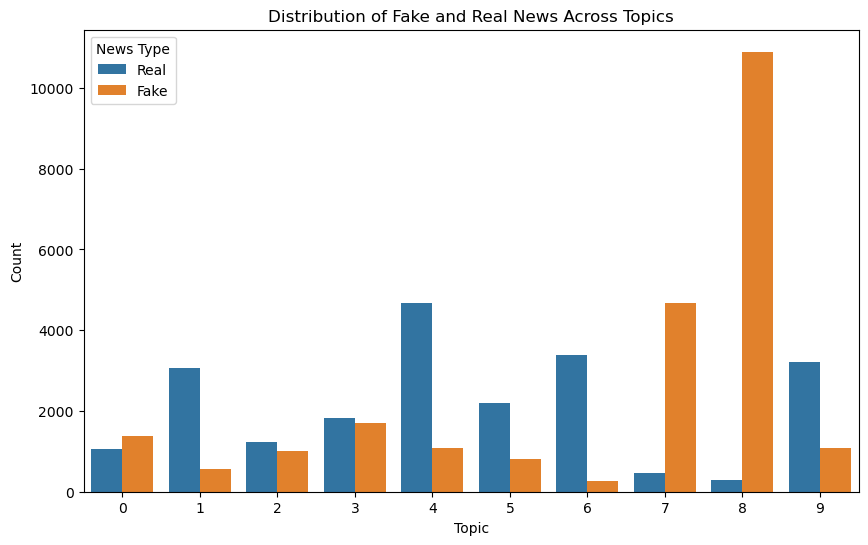

In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# Combine fake and real news datasets, drop blank rows, and vectorize data
combined_news_data = pd.concat([fake_news_data, real_news_data], ignore_index=True)
combined_news_data = combined_news_data.dropna()
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(combined_news_data['text'])

# LDA will help us understand visually the the split across datasets is
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()
no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print("Top words per topic:")
display_topics(lda, feature_names, no_top_words)

# Now we can set up the topics related to every article and visualize it.
topic_values = lda.transform(X)
combined_news_data['Topic'] = topic_values.argmax(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='Topic', hue='fake', data=combined_news_data)
plt.title('Distribution of Fake and Real News Across Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='News Type', labels=['Real', 'Fake'])
plt.show()


The output represents the top words associated with each topic identified by the LDA model. Each topic is represented by a set of words that frequently co-occur in the documents. These topics provide a broad overview of the themes present in the news articles, allowing for a more nuanced understanding of the distribution of fake and real news across different subjects. Topics 7 and 8 stand out as by far the most prevalent topics covered by fake news stories. This is a valuable insight for planning further model enhancements to improve future fake-real filter models. 

Creating an additional knowledge graph to better understand the relationships between words within the articles we're assessing. We can use an additional networkx function to identify central terms and their connections to each other. For both fake and real datasets, we can use this function to count how often words appear together. Hopefully, there is some additional value to be found in looking at co-occuring pairs of words, particularly within the fake news dataset, where tightly connected clusters of words around key themes might reveal the motivations of the creators. 

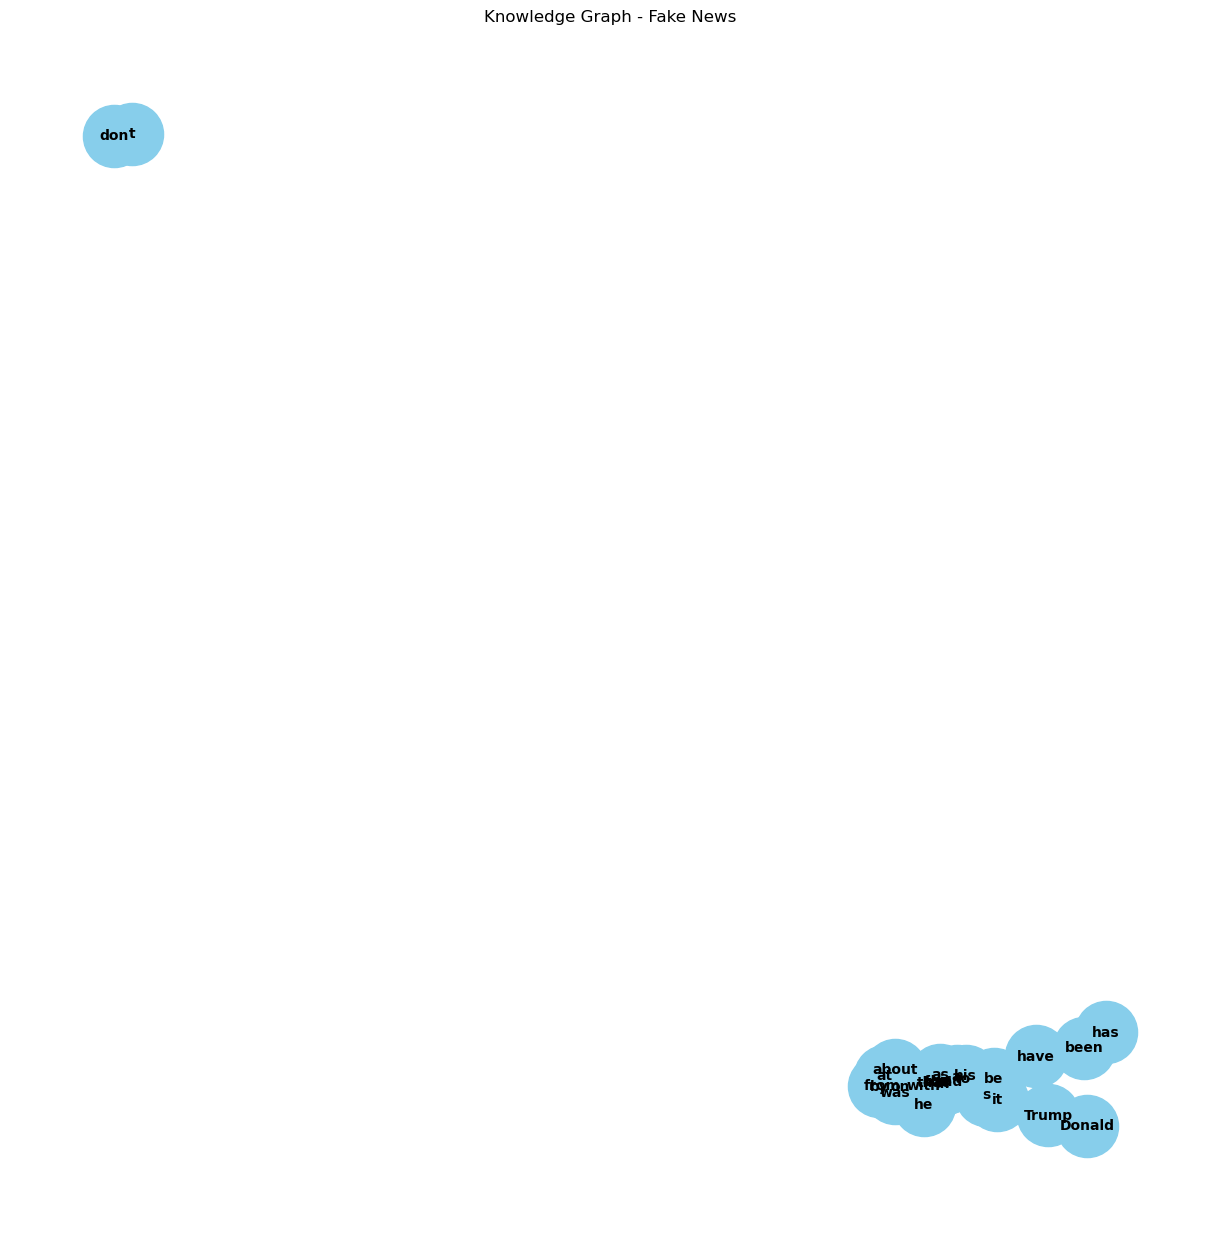

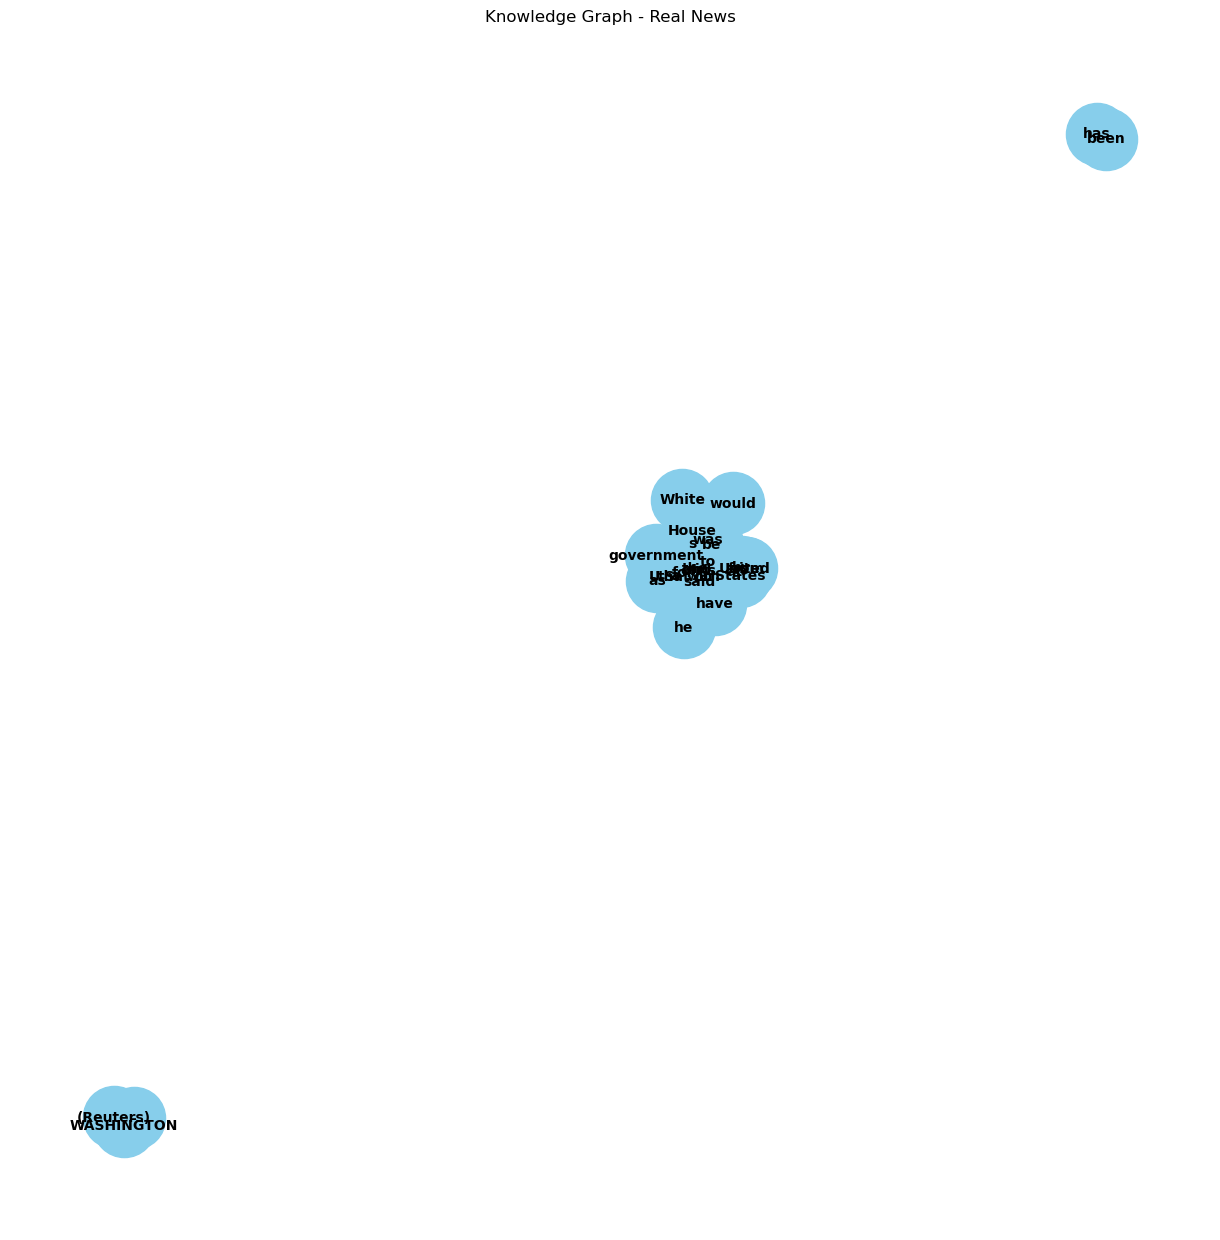

In [16]:
# We'll start by creating the function and generating the co-occurence matrix for each dataset.
def generate_cooccurrence_matrix(texts, window_size=2):
    cooccurrence_counts = Counter()
    for text in texts:
        tokens = text.split()
        for i in range(len(tokens)):
            token = tokens[i]
            window = tokens[i + 1:i + 1 + window_size]
            for co_token in window:
                if token != co_token:
                    pair = tuple(sorted([token, co_token]))
                    cooccurrence_counts[pair] += 1
    return cooccurrence_counts
fake_texts = fake_news_data['text'].values
real_texts = real_news_data['text'].values
fake_cooccurrence_counts = generate_cooccurrence_matrix(fake_texts)
real_cooccurrence_counts = generate_cooccurrence_matrix(real_texts)

# Now we can generate and visualize the kowledge graph
def create_knowledge_graph(cooccurrence_counts, top_n=50):
    G = nx.Graph()
    for (word1, word2), count in cooccurrence_counts.most_common(top_n):
        G.add_edge(word1, word2, weight=count)
    return G
fake_graph = create_knowledge_graph(fake_cooccurrence_counts)
real_graph = create_knowledge_graph(real_cooccurrence_counts)
def plot_knowledge_graph(G, title):
    pos = nx.spring_layout(G, k=0.1)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()
plot_knowledge_graph(fake_graph, 'Knowledge Graph - Fake News')
plot_knowledge_graph(real_graph, 'Knowledge Graph - Real News')

Unfortunately, this latest visualization doesn't do much to tell us much more than the large focus on Donald Trump among fake news articles and high usage of the term White House among real articles. Nevertheless, our knowledge graph exercise provides some additional useful context in our analysis.

Our overall analysis of the combined real and fake news dataset reveals distinct characteristics and patterns. The dataset primarily consists of political and world news articles, with a higher prevalence of articles related to political events. Fake news articles tend to have longer titles compared to real news articles, which are more concise and straightforward. This suggests a stylistic difference between fake and real news, potentially aimed at capturing reader attention through elaborate titles. Additionally, the text content of real news articles is generally longer than that of fake news articles. Analysis of the top 30 words used in both fake and real news highlights a strong focus on political figures and events, with common terms reflecting the discourse around elections and government actions.

The preprocessing and subsequent analysis involved tokenizing, stemming, lemmatizing, and removing stopwords from the text data. Various machine learning models, including Logistic Regression, Support Vector Machine (SVM), Decision Tree, and Random Forest, were trained and evaluated. Among these, the Random Forest model demonstrated the highest accuracy at 91.49%, followed closely by the SVM model at 90.86%. Logistic Regression and Decision Tree models performed slightly less effectively. Further steps in the research process could involve using topic modeling techniques like Latent Dirichlet Allocation (LDA) to identify and visualize core topics within the dataset. Additionally, applying advanced methods such as constructing a knowledge graph and using the island method could provide deeper insights into the relationships and dynamics between different topics, enhancing the understanding of how fake and real news articles are structured and distributed across themes.